### API Project Details

In this section, you need to try to find out answer to the given questions using the solutions you have done in Part 1 or you might need to write code to find the answers.
Find out the answer, justify them using proper plots and numbers and place them all in a pdf file and upload.
Find out answer for each question, put your answer along with the proper explanation and plots in a pdf file. Make a zip file of your pdf file and .ipynb file which is having code, and upload that.
Your report will be evaluated manually and score will be awarded accordingly.

### Dataset Collection -
Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.
Data has been collected from the Zomato API in the form of .json files(raw data) using the following url and stored in CSV file -
https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20 

Country Codes :
Country Code   Country
1              India

14             Australia

30             Brazil

37             Canada

94             Indonesia

148            New Zealand

162            Phillipines

166            Qatar

184            Singapore

189            South Africa

191            Sri Lanka

208            Turkey

214            UAE

215            United Kingdom

216            United States

### 1. The dataset is highly skewed toward the cities included in Delhi-NCR.
So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR.

Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato       API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable     graph to explain your inference.

1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.


In [1]:
import csv
import pandas as pd

df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
df.head(50)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


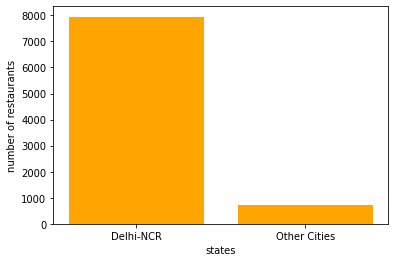

Delhi-NCR=  7947
Others=  705


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')

lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df=df.loc[df.Currency=='Indian Rupees(Rs.)']
cities=[]
for i in df['City']:
    cities.append(i)
np_city=np.array(cities)
count_delhi=0
other=0
for i in np_city:
    if i=='Delhi-NCR':
        count_delhi+=1
    else:
        other+=1
plt.bar(['Delhi-NCR', 'Other Cities'], [count_delhi, other], color='orange')
plt.xlabel('states')
plt.ylabel('number of restaurants')
plt.show()
print('Delhi-NCR= ', count_delhi)
print('Others= ', other)

In [3]:
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')


In [4]:
df= df.rename(columns={'Country Code': 'Countrycode'})

In [5]:
w= df.rename(columns={'Country Code': 'Countrycode'})


In [6]:
q=w[w.City=='New Delhi']
q1=w[w.City=='Ghaziabad']
q2=w[w.City=='Noida']
q3=w[w.City=='Gurgaon']
q4=w[w.City=='Faridabad']


#### 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [7]:
t=pd.concat([q,q1,q2,q3,q4])
s=t['Cuisines']
l=[]
for i in s:
    g=i.split(',')
    for h in g:
        l.append(h.strip())


In [8]:
w=df[df.Countrycode==1]
k=[]

    
for index,i in w.iterrows():
    if i['City']!='Ghaziabad' and i['City']!='New Delhi' and i['City']!='Noida' and i['City']!='Gurgaon' and i['City']!='Faridabad':
        t=i['Cuisines']
        g=t.split(',')
        for h in g:
            k.append(h.strip())
r=list(set(k) - set(l))
print(r)


['BBQ', 'Malwani', 'Cajun', 'German']


#### 3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


In [9]:

t=pd.concat([q,q1,q2,q3,q4])

f=[]
y=[]
s=t['Cuisines'].value_counts()
print(s)
for i in range(0,10):
    f.append(s.index[i])
    y.append(s.values[i])



North Indian                                                   904
North Indian, Chinese                                          475
Fast Food                                                      331
Chinese                                                        325
North Indian, Mughlai                                          315
                                                              ... 
Cafe, American, Tea                                              1
Asian, Chinese, Thai, Vietnamese                                 1
North Indian, South Indian, Chinese, Street Food, Fast Food      1
Mithai, North Indian, South Indian, Chinese, Fast Food           1
Bakery, Desserts, Bakery                                         1
Name: Cuisines, Length: 1157, dtype: int64


In [10]:
from pandas import DataFrame
b=[]
for index,i in w.iterrows():
    if i['City']!='Ghaziabad' and i['City']!='New Delhi' and i['City']!='Noida' and i['City']!='Gurgaon' and i['City']!='Faridabad':
        b.append(i['Cuisines'])
a=DataFrame(b) 
print(a.value_counts()[0:10])
g=[]
g1=[]
a=t['Cuisines'].value_counts()

for i in range(0,10):
    g.append(a.index[i])
    g1.append(a.values[i])
    

North Indian, Chinese                 36
North Indian                          32
Cafe                                  25
North Indian, Mughlai                 19
Fast Food                             17
Chinese                               15
North Indian, Chinese, Continental    12
Cafe, Fast Food                        9
South Indian                           7
Cafe, Continental                      7
dtype: int64


From the Below graph we can find that Cuisine named NORTH INDIAN is most popular cuisine in both Delhi-NCR and Rest of india
and also there are some cuisine like fast food and chinese which we can say have something in common but there there is alot of difference in 
value of counting. And there are also some cuisines which are available in Delhi-Ncr in top 10 like bakkery,Street food,Bakery,Desert but not present in rest of india list.
Let's see in the graph below

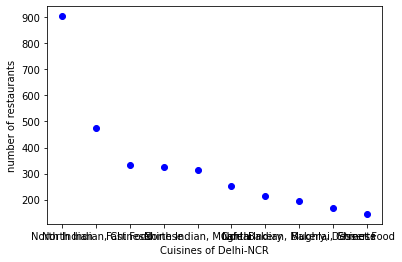

In [11]:
import matplotlib.pyplot as plt

plt.scatter(f[0:10], y[0:10], c='blue')
plt.xlabel('Cuisines of Delhi-NCR')
plt.ylabel('number of restaurants')
plt.show()


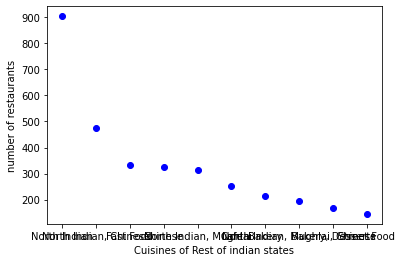

In [12]:
import matplotlib.pyplot as plt
plt.scatter(g[0:10], g1[0:10], c='blue')
plt.xlabel('Cuisines of Rest of indian states')
plt.ylabel('number of restaurants')
plt.show()

#### 4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
 #### Ans: From the above graph we can infer that "North Indian" cuisine is the most popular among restaurants of Delhi_NCR as well as other states. Here I have plotted only those 30 important cuisines which are common in both Delhi-NCR and other states. There are some cuisines present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cuisine we have Chinese cuisine with 2448 restaurants in Delhi-NCR and 242 in other states of India. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in other states(a huge difference). After this we have Mughlai cuisine in Delhi-NCR with 933 restaurants

### 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
    1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable         graph to explain your inference.
    
        1.Number of Votes given Restaurant
        
        2.Restaurant serving more number of cuisines.
        
        3.Average Cost of Restaurant
        
        4.Restaurant serving some specific cuisines.
        
    1.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant     rating?
    
        1.Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

####  1.Number of Votes given Restaurant

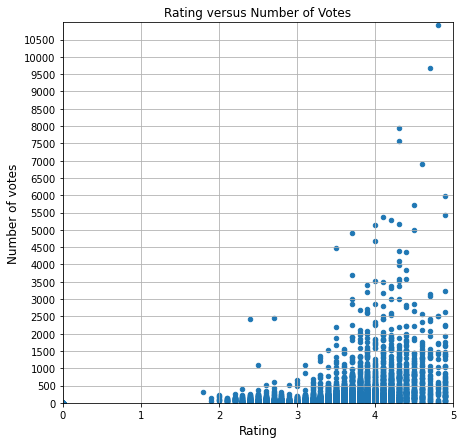

In [13]:
import pandas as pd
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7, 7))
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=1)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating', size=12)
plt.ylabel('Number of votes', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

#### As a saw in the above graph that with the increase in no. of votes is directly proportional to increase of rating. So it means that a restaurant having more no. of votes have rating between 4 or 5.  Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

  ### 2.Restaurant serving more number of cuisines.


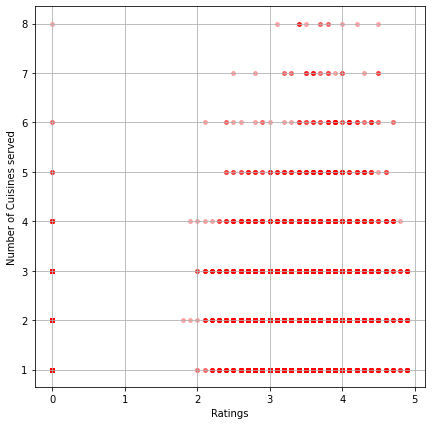

number of cuisines served=  3 , number of restaurants serving given number of cuisines=  1840
number of cuisines served=  1 , number of restaurants serving given number of cuisines=  3394
number of cuisines served=  4 , number of restaurants serving given number of cuisines=  584
number of cuisines served=  2 , number of restaurants serving given number of cuisines=  3444
number of cuisines served=  5 , number of restaurants serving given number of cuisines=  164
number of cuisines served=  6 , number of restaurants serving given number of cuisines=  74
number of cuisines served=  7 , number of restaurants serving given number of cuisines=  28
number of cuisines served=  8 , number of restaurants serving given number of cuisines=  14


In [14]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]

rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7, 7))
plt.scatter(rating, cuisines, c='red', s=15, alpha=0.3)
plt.xlabel('Ratings')
plt.ylabel('Number of Cuisines served')
plt.grid()
plt.show()
dic=dict()
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("number of cuisines served= ", i, ", number of restaurants serving given number of cuisines= ", dic[i])

##### <b>Clearly from the above graph, we can see that restaurents serving more no. of cuisines are not likely to have high or good ratings whether the restaurents having mainly 1 and types of cuisines are more likely to have higher ratings. As we saw in the graph the restaurents serving more than 6 cuisines are not having good rating</b>

#### 3.Average Cost of Restaurant

In [15]:
print(9)

9


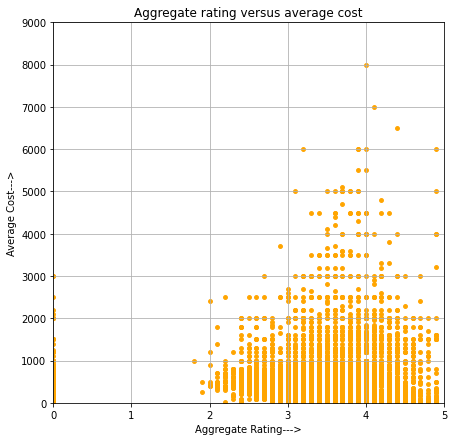

In [16]:
import pandas as pd
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7, 7))

plt.axis([0, 5, 0, 9000])
rating=[i for i in df['Aggregate rating']]

plt.scatter(rating, df['Average Cost for two'], s=15, c='orange')
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()



#### As we see clearly in the graph that when the average cost is upto 2000 then mostly rating is between 3 to 5 which is good and with increase in the average cost the rating is mostly between 4 to 5 but when the average cost is between 1500 to 2500 then there is slighty decrease in rating of the restaurents.

#### 4.Restaurant serving some specific cuisines.

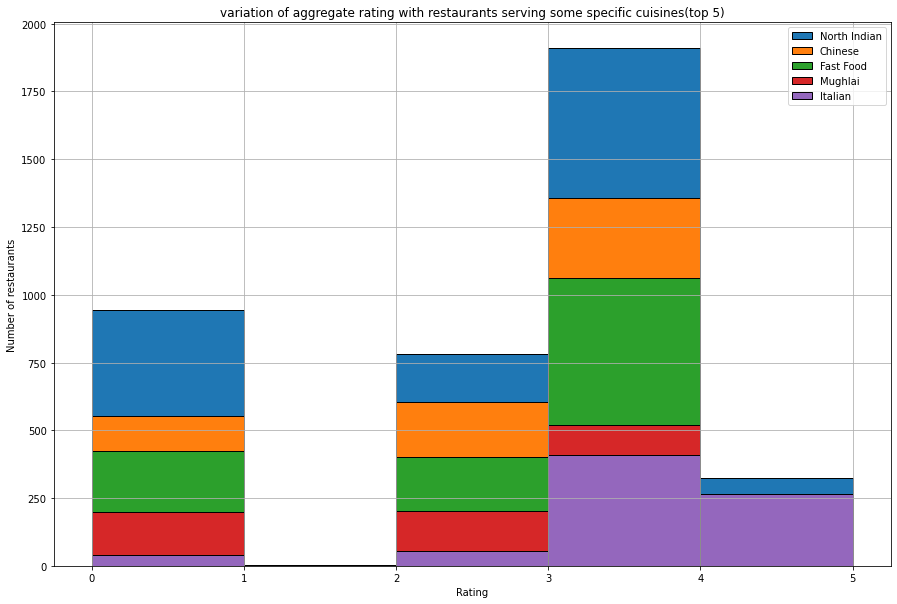

In [17]:
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
df = df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]
plt.figure(figsize=(15, 10))
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating')
    plt.ylabel('Number of restaurants')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
    
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

#### 1.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant     rating?

    1.Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [18]:
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        
np_local=np.array([i for i in dic.keys()])
np_wrr=np.array([i for i in dic.values()])

np_local=np_local[np.argsort(np_wrr)][::-1]

np_wrr=np.sort(np_wrr)[::-1]

for i in range(0,10):
    print(np_local[i], "-", np_wrr[i])
    


Bishopsgate, City Of London - 4.9
Cengkareng - 4.9
Windermere - 4.9
Penjaringan - 4.9
Pondok Aren - 4.9
DIFC - 4.9
Paia - 4.9
Gíçvea - 4.9
Setor De Clubes Esportivos Sul - 4.9
Lexington Street, Soho - 4.9


### 3.Visualization
1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

#### 1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

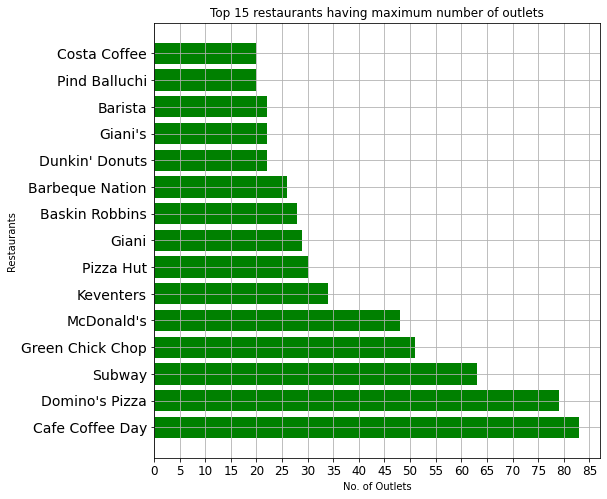

In [19]:
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')

dic=dict()

for i in df['Restaurant Name']:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

np_names=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])

np_names=np_names[np.argsort(np_freq)][::-1]

np_freq=np_freq[np.argsort(np_freq)][::-1]
plt.figure(figsize=(8, 8))
plt.barh(np_names[0:15], np_freq[0:15], color='green')
plt.grid()
plt.ylabel('Restaurants')
plt.xlabel('No. of Outlets')
plt.title('Top 15 restaurants having maximum number of outlets')
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

#### 2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

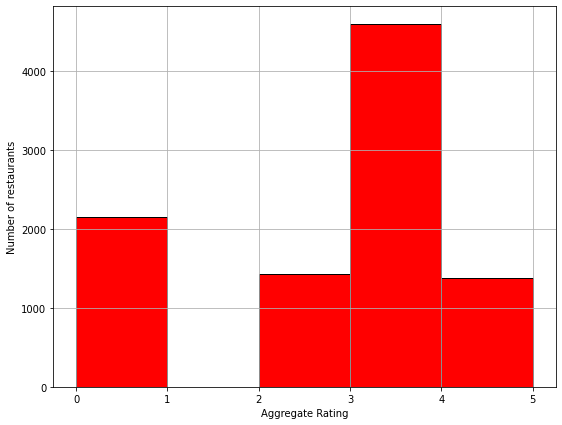

In [20]:
x=df['Aggregate rating'].dropna()
plt.figure(figsize=(9, 7))
plt.xticks(range(6))
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of restaurants')
plt.hist(x, color='red', edgecolor='black', bins=range(6))

plt.grid()
plt.show()

#### 3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.


<ipython-input-21-558fadc252df>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(industry_amount.index[0:10], industry_amount.values[0:10], color='rbg')


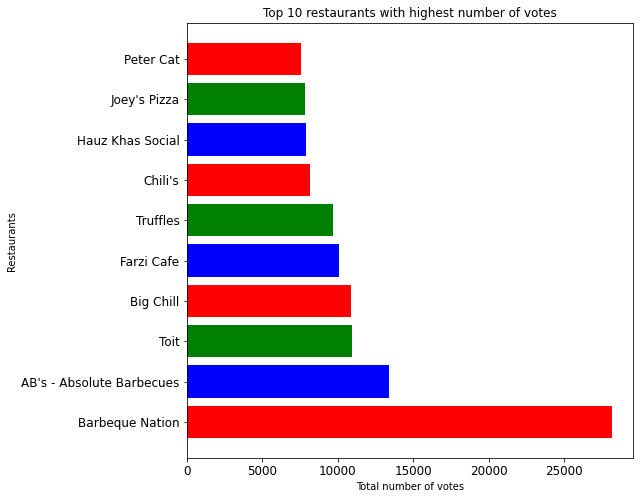

In [21]:
industry_amount=df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)[0:10]
plt.figure(figsize=(8, 8))
plt.barh(industry_amount.index[0:10], industry_amount.values[0:10], color='rbg')
plt.xlabel('Total number of votes')
plt.ylabel('Restaurants')
plt.title('Top 10 restaurants with highest number of votes')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [22]:
print(industry_amount.values[0:10])

[28142 13400 10934 10853 10098  9682  8156  7931  7807  7574]


#### 4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [23]:
df= df.rename(columns={'Country Code': 'Countrycode'})


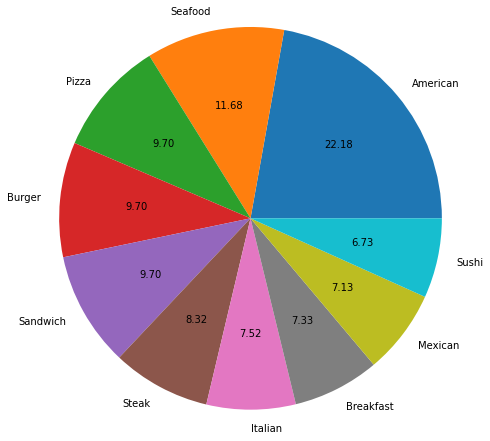

In [24]:
df=df.loc[df['Cuisines'].notnull()]
df=df.loc[df['Countrycode']==216]

cus=[]
for i in df.Cuisines:
    for j in i.split(','):
        cus.append(j.strip())
dic=dict()
for i in cus:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1

np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]
np_freq=np.sort(np_freq)[::-1]

plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2.2, autopct='%.2f')
plt.show()

5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

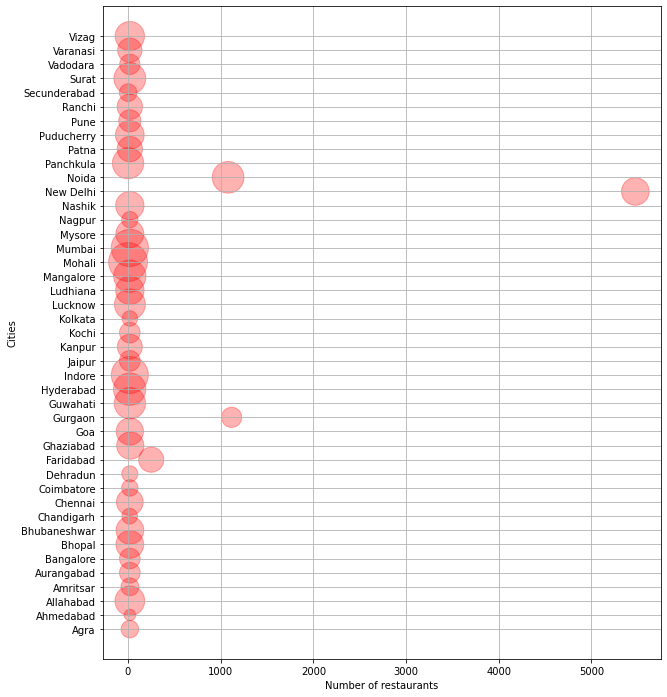

In [25]:
df = pd.read_csv(r'zomato.csv', encoding='ISO-8859-1')
df = df.loc[df.Currency=='Indian Rupees(Rs.)']

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_city=np.array([i for i in df['City']])
dic=dict()
for i in set(np_city):
    if sum(np_votes[np.argwhere(np_city==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_city==i)])[0]/sum(np_votes[np.argwhere(np_city==i)])[0]
dic1=dict()

for i in np_city:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1


size=[]
for i in dic:
    size.append(dic[i])
        

plt.figure(figsize=(10, 12))
plt.scatter(dic1.values(), dic1.keys(), s=5**np.array(size), alpha=0.3, c='red')
plt.xlabel('Number of restaurants')
plt.ylabel('Cities')
plt.grid()
plt.show()


